# Task A6.2 Exploring Relationships

## Table of Contents

### 01. Importing Visualization Libraries & Data
### 02. Deriving New Variables to Aid in Exploratory Analysis
### 03. Correlation Matrix Heatmap
### 04. Scatterplot
### 05. Pair Plot
### 06. Categorical Plot
### 07. Revisit Questions
### 08. Define Hypotheses
### 09. Explort Dataframe

## 01. Importing Visualization Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlab version
matplotlib.__version__

'3.7.0'

In [3]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 6/07-2023 Employee Attrition'

In [4]:
# employee attrition dataframe creation
df_ea = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employee_attrition_wrangled.csv'), index_col = False)

In [5]:
# Check dataframe
df_ea.head()

,Unnamed: 0,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today
0,0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69
1,1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69
2,2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69
3,3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69
4,4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69


## 02. Deriving New Variables to Aid in Exploratory Analysis

#### 02a. Using age_today variable to create new variable indicating generation of employee

In [7]:
# Calculating based on age_today variable and based on generational age cut-offs as described here: https://www.beresfordresearch.com/age-range-by-generation/

generation = []

for value in df_ea['age_today'].tolist():
    if value >= 11 and value <= 26:
        generation.append('Gen Z')
    elif value >= 27 and value <= 42:
        generation.append('Millennials')
    elif value >= 43 and value <= 58:
        generation.append('Gen X')
    elif value >= 59 and value <= 77:
        generation.append('Boomers')
    elif value >= 78 and value <= 95:
        generation.append('Post War')
    elif value >= 96 and value <= 101:
        generation.append('WWII')
    else:
        print('Weird value:', value)

In [8]:
# Checking output of generation
generation

['Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Boomers',
 'Gen X',
 'Gen X',
 'Gen X',
 'Gen X',


In [9]:
# Adding generation column
df_ea['generation'] = generation

In [10]:
# Frequency distribution of generation 
df_ea['generation'].value_counts(dropna = False)

Boomers        19539
Gen X          18575
Millennials    10592
Post War         947
Name: generation, dtype: int64

In [11]:
# Checking dataframe
df_ea.head()

,Unnamed: 0,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation
0,0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers
1,1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers
2,2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers
3,3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers
4,4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers


In [12]:
# Dropping "Unnamed: 0" column - testing
df_ea.drop(columns = ['Unnamed: 0'])

,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation
0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers
1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers
2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers
3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers
4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,5/28/94,8/19/13,12/30/15,21,2,Valemount,Dairy,Dairy Person,34,Male,Layoff,Involuntary,2015,TERMINATED,STORES,29,Millennials
49649,8264,6/13/94,8/27/13,8/30/13,19,0,Vancouver,Customer Service,Cashier,44,Female,Resignaton,Voluntary,2013,TERMINATED,STORES,29,Millennials
49650,8279,7/18/94,9/15/13,12/30/15,21,2,White Rock,Customer Service,Cashier,39,Female,Layoff,Involuntary,2015,TERMINATED,STORES,29,Millennials
49651,8296,9/2/94,10/9/13,12/31/13,19,0,Kelowna,Customer Service,Cashier,16,Female,Resignaton,Voluntary,2013,TERMINATED,STORES,29,Millennials


In [13]:
# Dropping "Unnamed: 0" column from dataframe
df_ea = df_ea.drop(columns = ['Unnamed: 0'])

In [14]:
# Checking dataframe
df_ea.head()

,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation
0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers
1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers
2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers
3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers
4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers


#### 02b. Using job_title variable to create new variable to indicate whether employee is a manager or not

In [15]:
# Exploring job_title variable
df_ea['job_title'].value_counts(dropna = False)

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer                     17


Industry practice that managers are those who have direct reports; employee will be marked as a manager if their title contains the words 'manager,' 'director,' 'VP,' or indicates they are part of the C-suite. Otherwise, the employee will be considered an individual contributor and not a manager. 

In [17]:
# Creating manager_flag

manager_flag = []

for x in df_ea['job_title']:
    if x in ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier', 'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk', 'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receivable Clerk', 'Trainer', 'Accounts Payable Clerk', 'Auditor', 'Systems Analyst', 'Investment Analyst', 'Compensation Analyst', 'Corporate Lawyer', 'Exec Assistant, VP Stores', 'Legal Counsel', 'Exec Assistant, Finance', 'Exec Assistant, Human Resources', 'Exec Assistant, Legal Counsel']:
        manager_flag.append('No')
    elif x in ['Customer Service Manager', 'Processed Foods Manager', 'Bakery Manager', 'Meats Manager', 'Produce Manager', 'Store Manager', 'CEO', 'VP Stores', 'VP Human Resources', 'VP Finance', 'Director, Recruitment', 'Chief Information Officer', 'Director, Accounts Payable', 'Director, Accounts Receivable', 'Director, Employee Records', 'Director, HR Technology', 'Dairy Manager', 'Director, Accounting', 'Director, Investments', 'Director, Labor Relations', 'Director, Compensation', 'Director, Audit', 'Director, Training']:
        manager_flag.append('Yes')   
    else:
        manager_flag.append('Unknown')

In [18]:
# Checking output of manager_flag
manager_flag

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 '

In [19]:
# Adding manager column
df_ea['manager?'] = manager_flag

In [20]:
# Checking frequency
df_ea['manager?'].value_counts(dropna = False)

No         47775
Yes         1848
Unknown       30
Name: manager?, dtype: int64

In [22]:
# Checking the Unknowns
df_ea[df_ea['manager?']=='Unknown']

,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation,manager?
798,1524,1/21/50,3/19/90,1/21/15,56,16,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,73,Boomers,Unknown
799,1524,1/21/50,3/19/90,1/21/15,57,17,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,73,Boomers,Unknown
800,1524,1/21/50,3/19/90,1/21/15,58,18,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,73,Boomers,Unknown
801,1524,1/21/50,3/19/90,1/21/15,59,19,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,73,Boomers,Unknown
802,1524,1/21/50,3/19/90,1/21/15,60,20,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,73,Boomers,Unknown
803,1524,1/21/50,3/19/90,1/21/15,61,21,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE,73,Boomers,Unknown
804,1524,1/21/50,3/19/90,1/21/15,62,22,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE,73,Boomers,Unknown
805,1524,1/21/50,3/19/90,1/21/15,63,23,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE,73,Boomers,Unknown
806,1524,1/21/50,3/19/90,1/21/15,64,24,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Female,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE,73,Boomers,Unknown
820,1529,1/30/50,3/24/90,1/30/10,56,16,Vancouver,Accounts Receiveable,Accounts Receiveable Clerk,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,73,Boomers,Unknown


Spelling error resulted in "Accounts Receiveable Clerk" becoming "Unknown" mistakenly. Fixing error below

In [23]:
# Dropping "manager?" column from dataframe since it is incorrect
df_ea = df_ea.drop(columns = ['manager?'])

In [24]:
# Creating corrected manager_flag2

manager_flag2 = []

for x in df_ea['job_title']:
    if x in ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier', 'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk', 'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk', 'Trainer', 'Accounts Payable Clerk', 'Auditor', 'Systems Analyst', 'Investment Analyst', 'Compensation Analyst', 'Corporate Lawyer', 'Exec Assistant, VP Stores', 'Legal Counsel', 'Exec Assistant, Finance', 'Exec Assistant, Human Resources', 'Exec Assistant, Legal Counsel']:
        manager_flag2.append('No')
    elif x in ['Customer Service Manager', 'Processed Foods Manager', 'Bakery Manager', 'Meats Manager', 'Produce Manager', 'Store Manager', 'CEO', 'VP Stores', 'VP Human Resources', 'VP Finance', 'Director, Recruitment', 'Chief Information Officer', 'Director, Accounts Payable', 'Director, Accounts Receivable', 'Director, Employee Records', 'Director, HR Technology', 'Dairy Manager', 'Director, Accounting', 'Director, Investments', 'Director, Labor Relations', 'Director, Compensation', 'Director, Audit', 'Director, Training']:
        manager_flag2.append('Yes')   
    else:
        manager_flag2.append('Unknown')

In [25]:
# Adding manager column
df_ea['manager?'] = manager_flag2

In [26]:
# Checking frequency
df_ea['manager?'].value_counts(dropna = False)

No     47805
Yes     1848
Name: manager?, dtype: int64

In [27]:
# Checking output of dataframe
df_ea.head()

,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation,manager?
0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers,Yes
1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers,Yes
2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers,Yes
3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers,Yes
4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers,Yes


In [28]:
# Columns list
df_ea.columns

Index(['EmployeeID', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_full',
       'termreason_desc', 'termtype_desc', 'status_year', 'status',
       'business_unit', 'age_today', 'generation', 'manager?'],
      dtype='object')

## 03. Correlation Matrix Heatmap

### 03a. Correlation Matrix Heatmap using matplotlib

In [29]:
# Correlation matrix of all variables
df_ea.corr()

/var/folders/2x/7bz34nhx55b0cg_q5g2zvsn40000gn/T/ipykernel_45969/3662876069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ea.corr()


,EmployeeID,age,length_of_service,store_name,status_year,age_today
EmployeeID,1.000000,-0.926278,-0.898833,-0.010321,0.198741,-0.939184
age,-0.926278,1.000000,0.909430,-0.004068,-0.039738,0.975246
length_of_service,-0.898833,0.909430,1.000000,0.011724,0.237022,0.826469
store_name,-0.010321,-0.004068,0.011724,1.000000,0.008656,-0.005847
status_year,0.198741,-0.039738,0.237022,0.008656,1.000000,-0.259702
age_today,-0.939184,0.975246,0.826469,-0.005847,-0.259702,1.000000


/var/folders/2x/7bz34nhx55b0cg_q5g2zvsn40000gn/T/ipykernel_45969/2742848047.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_ea.corr())


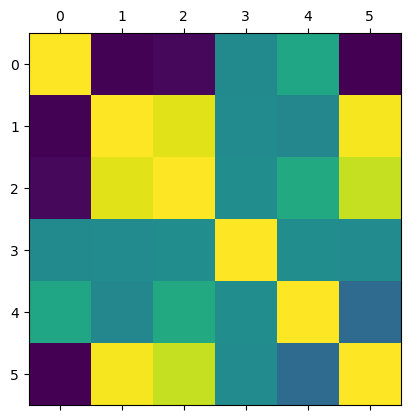

In [30]:
# Correlation heatmap using matplotlib

plt.matshow(df_ea.corr())
plt.show()

In [31]:
# Checking current dir
cwd = os.getcwd()
cwd

'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 6'

/var/folders/2x/7bz34nhx55b0cg_q5g2zvsn40000gn/T/ipykernel_45969/699224314.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_ea.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

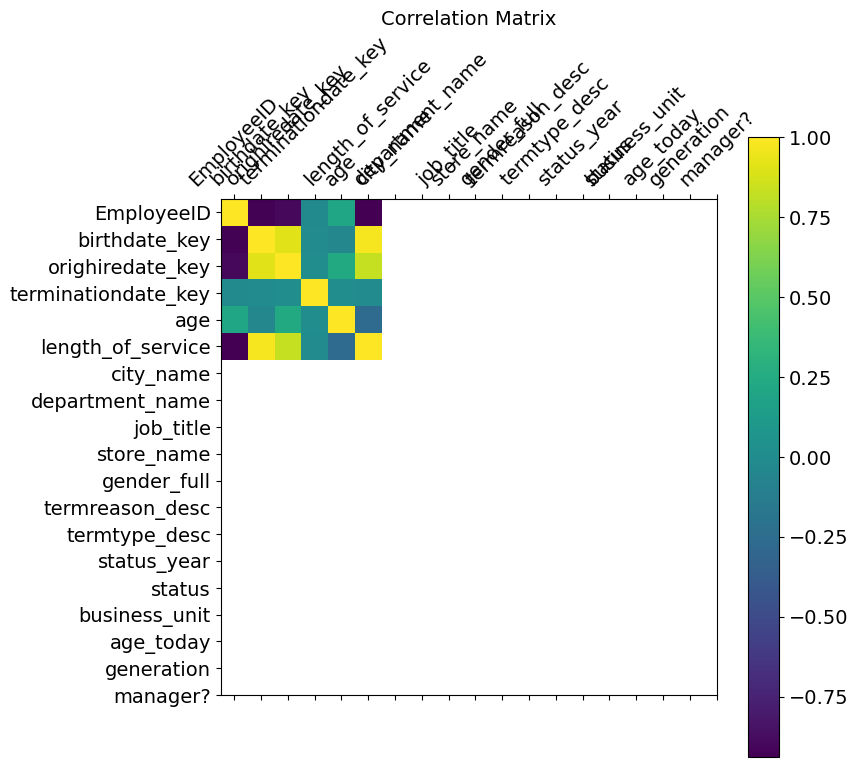

In [32]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_ea.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_ea.shape[1]), df_ea.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_ea.shape[1]), df_ea.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Not all variables are numeric, so will create a subset of the dataframe to create a more readable correlation matrix

In [33]:
# Creating subset of dataframe with numeric variables
df_ea_num = df_ea[['EmployeeID','age','length_of_service','store_name','status_year','age_today']]

Text(0.5, 1.0, 'Correlation Matrix')

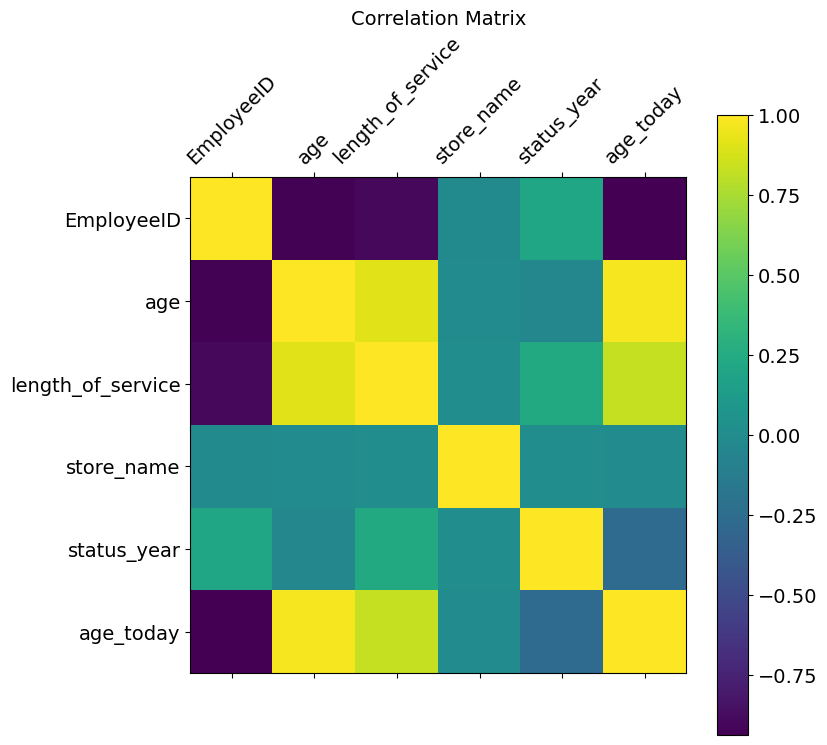

In [34]:
# Attempt 2 at correlation matrix with labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_ea_num.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_ea_num.shape[1]), df_ea_num.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_ea_num.shape[1]), df_ea_num.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [35]:
# Save figure
plt.savefig("corr_all.png")

<Figure size 640x480 with 0 Axes>

### 03b. Correlation Matrix Heatmap using seaborn

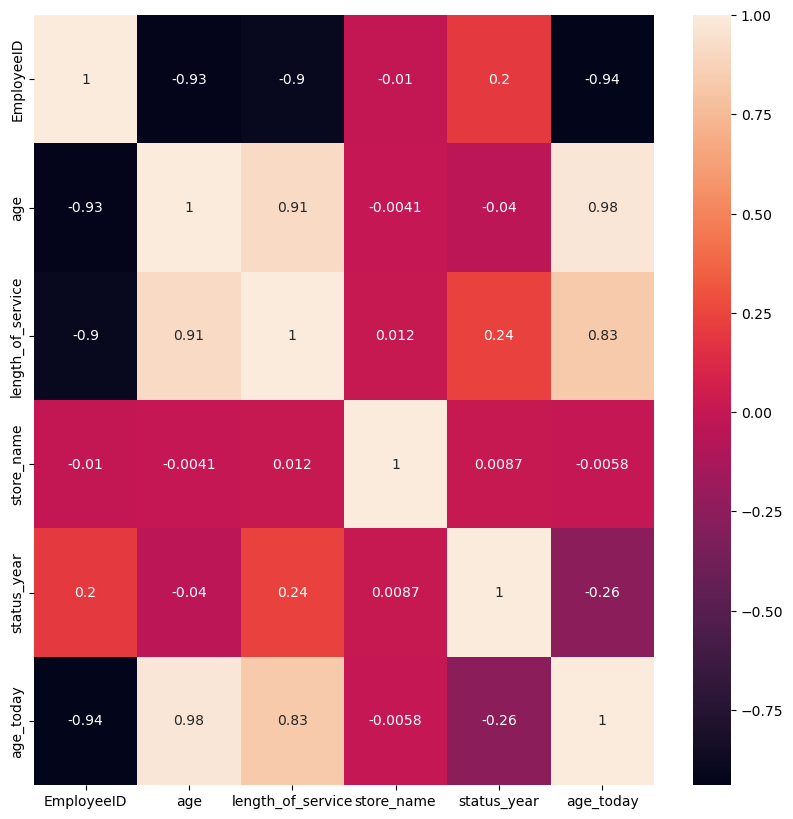

In [36]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_ea_num.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### 03c. What do the coefficients in the plot mean in terms of the relationships between the variables?

There seems to be a strong, positive linear relationship between age and length of service (0.91). The older someone is, the longer they are at the company.

## 04. Scatterplot for variables with strongest correlations

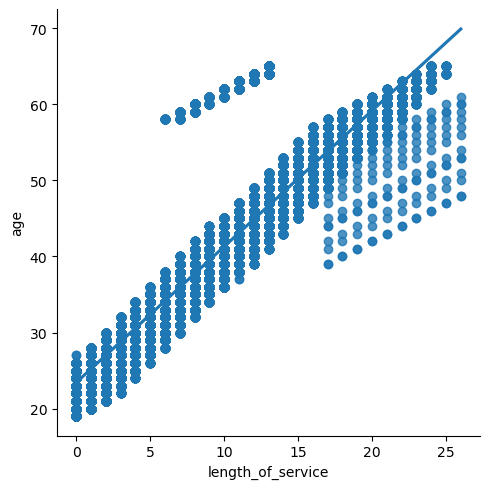

In [38]:
# Create a scatterplot for the "length of service" and "age" columns in seaborn

sns.lmplot(x = 'length_of_service', y = 'age', data = df_ea_num)

It appears that there are a few outliers (top left of the line and bottom right of the line), but all-in-all, there appears to be a recognizable correlation between length of service and age.

## 05. Pair Plot for Dataset

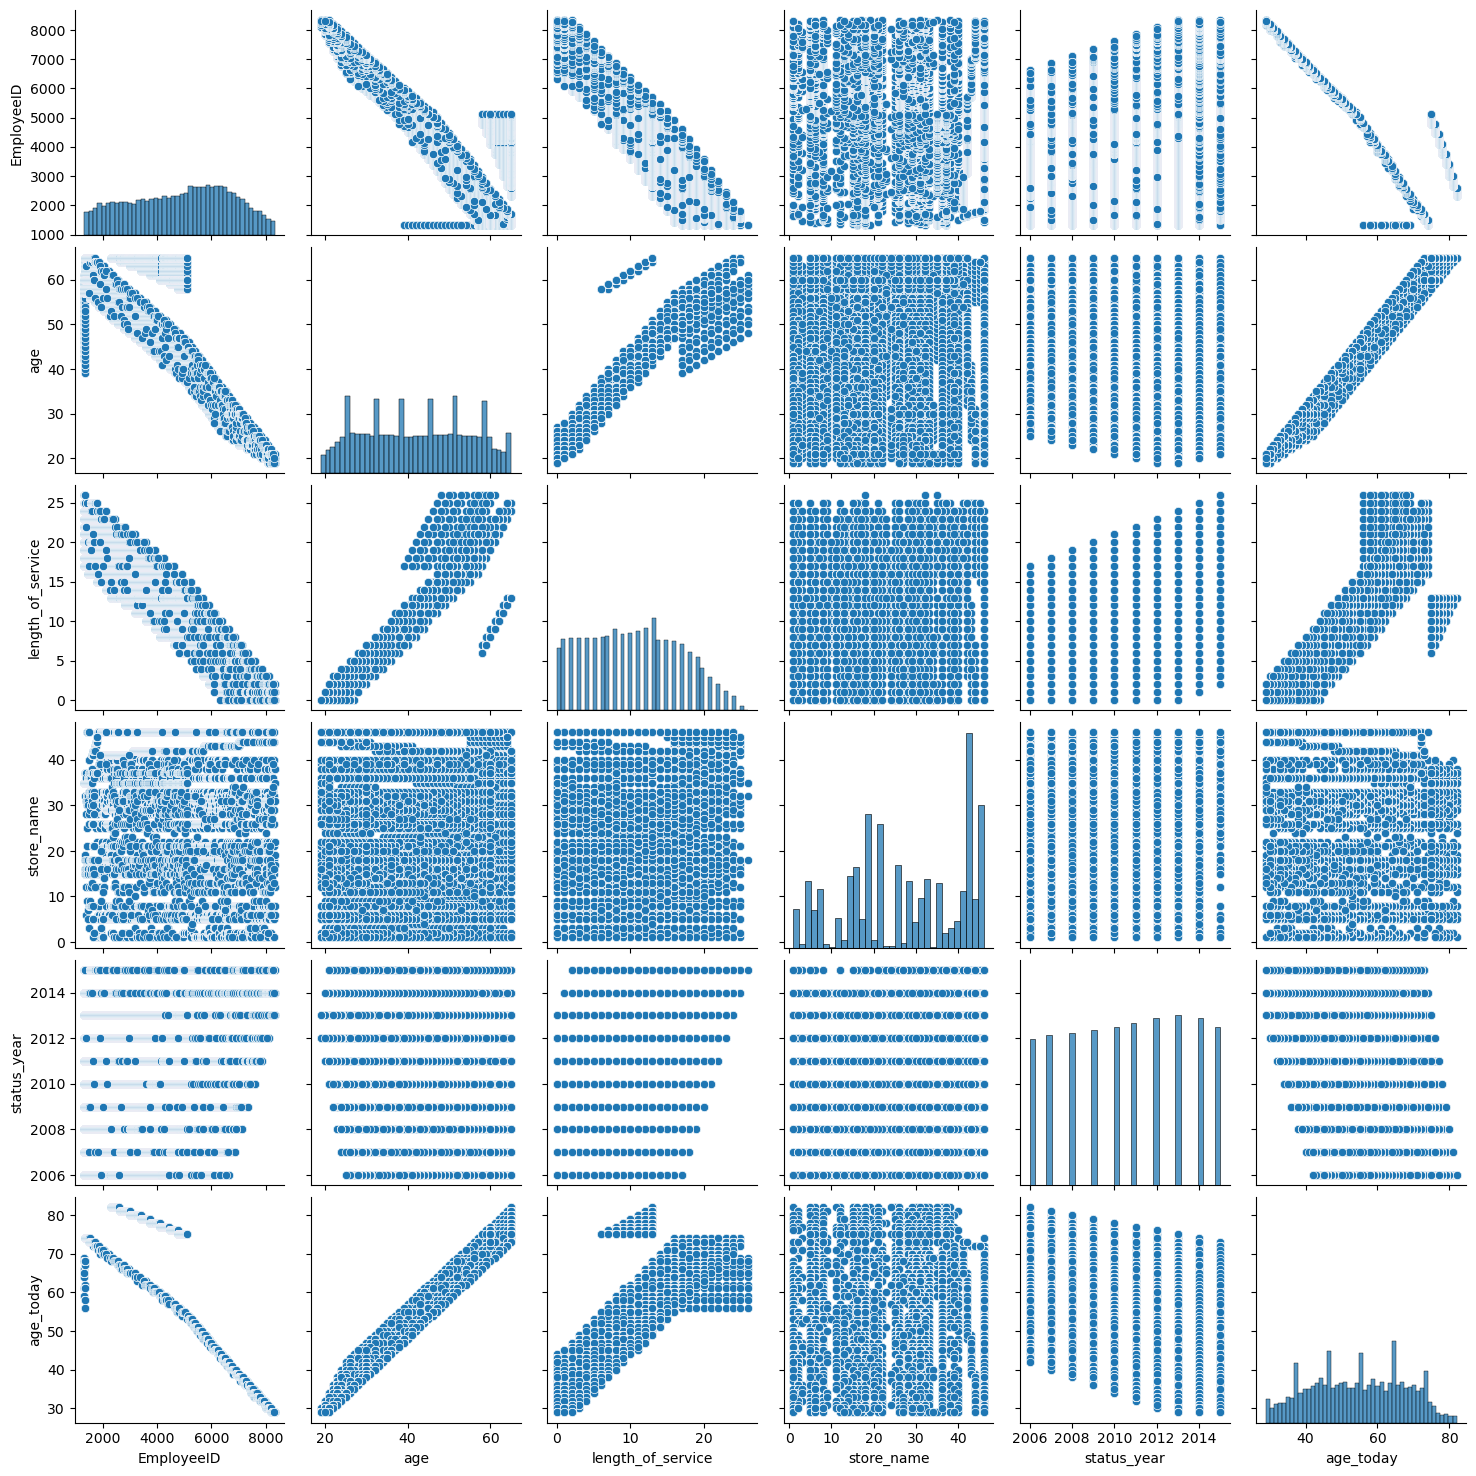

In [39]:
# Create a pair plot
g = sns.pairplot(df_ea_num)

I am most interested in how length of service is impacted by other variables. Of the variables available, age is the one that I would hypothesize to have impact. However, I would want to understand why status year and length of service is distributed the way it is, and perhaps want to understand if there is a pattern to the "store name." 

## 06. Categorical plot

<Axes: xlabel='length_of_service', ylabel='Count'>

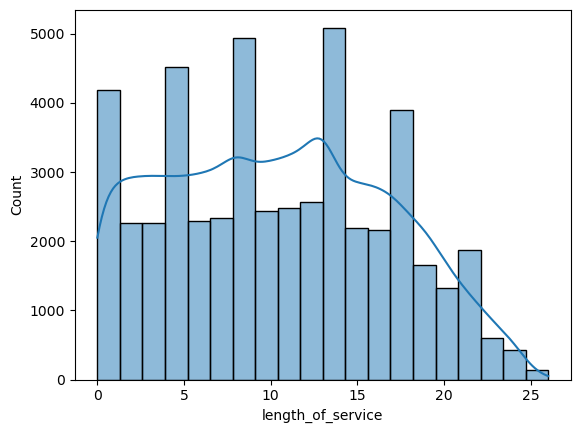

In [40]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_ea_num['length_of_service'], bins = 20, kde = True)

It would appear that there are common tenures or lengths of service that employees tend to hit: They may leave early on, at the five year mark, around 8 years, 13-14 years, 17 years, etc. It seems most employees will stay at the company until around 13-14 years. These are helpful markers, as the company can target these tenures with career development opportunities, conversations, etc. 

## 07. Revisit questions

From the questions generated from the previous Task, we have a first look at how age impacts attrition, or length of service. We saw that there was a strong, positive linear relationship - when age increases, length of service increases.

## 08. Define any hypotheses

If an employee is 40 or above, they have a length of service of over 10 years.

If an employee is 30 or below, they have a length of service less than 1 year.

## 09. Export dataframe

In [41]:
df_ea.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employee_attrition_wrangled.6.2.csv'))